In [10]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os

# Agregar la carpeta 'src' al sys.path
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)
    import support_LinearRegression as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("../data/df_te.csv")
df.sample(5)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
102196,5722.744529,5722.69042,3300.0,5721.515220,2912.480757,5236.859483,4654.329823,4702.257069,3073.553291,2369.921733,-0.492754,-1.0
339660,5722.744529,5722.69042,3000.0,5721.515220,5212.719911,1769.244434,4654.329823,8454.021359,8229.975718,3346.962677,0.304348,0.0
123960,5722.744529,5722.69042,4550.0,5721.515220,6666.113367,5236.859483,4654.329823,8454.021359,5407.374502,6707.871077,-0.130435,0.0
269618,5722.744529,5722.69042,350.0,5723.869135,5212.719911,1769.244434,3311.581592,3231.275073,4123.442393,3346.962677,-0.818841,0.0
265431,5722.744529,5722.69042,2499.0,5721.515220,6666.113367,5236.859483,4654.329823,8454.021359,3810.381798,2369.921733,0.231884,0.0


In [12]:
x=df.drop("price",axis=1)
y=df[["price"]]

In [13]:
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
modelo_lineal=LinearRegression()
modelo_lineal.fit(x_train,y_train)

LinearRegression()

In [14]:
y_test_pred=modelo_lineal.predict(x_test)
y_train_pred=modelo_lineal.predict(x_train)

In [15]:
metricas_modelo_lineal=sp.metricas(y_train,y_train_pred,y_test,y_test_pred)
metricas_modelo_lineal

,r2_score,MAE,MSE,RMSE
train,0.649073,2732.747950,1.585576e+07,3981.928576
test,0.645865,2723.214418,1.575489e+07,3969.242871
diferences,0.003207,9.533533,1.008662e+05,12.685705


Las métricas indican que el modelo tiene un desempeño aceptable, aunque no excepcional. En cuanto a las metricas:

- R² Score: Alrededor de 0.65 para entrenamiento y prueba sugiere que el modelo explica aproximadamente el 65% de la varianza de los datos. Aunque es aceptable se puede mejorar.
- MAE (Error Absoluto Medio): El MAE está en el rango de 2730, lo que significa que, en promedio, el modelo se equivoca por esa cantidad en las predicciones. 
- MSE y RMSE: El RMSE sobre 3980 confirma que hay errores relativamente grandes en algunas predicciones (ya que el RMSE penaliza más los errores grandes que el MAE).
- Diferencias entre train y test: Las diferencias en las métricas son mínimas, lo que indica que el modelo generaliza bien y no sufre de "overfiting".

In [16]:
# Asegurarse de que las variables sean unidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()
y_train = np.array(y_train).ravel()
y_train_pred = np.array(y_train_pred).ravel()

# Opcional: Convertir a series de Pandas
y_test = pd.Series(y_test)
y_test_pred = pd.Series(y_test_pred)
y_train = pd.Series(y_train)
y_train_pred = pd.Series(y_train_pred)

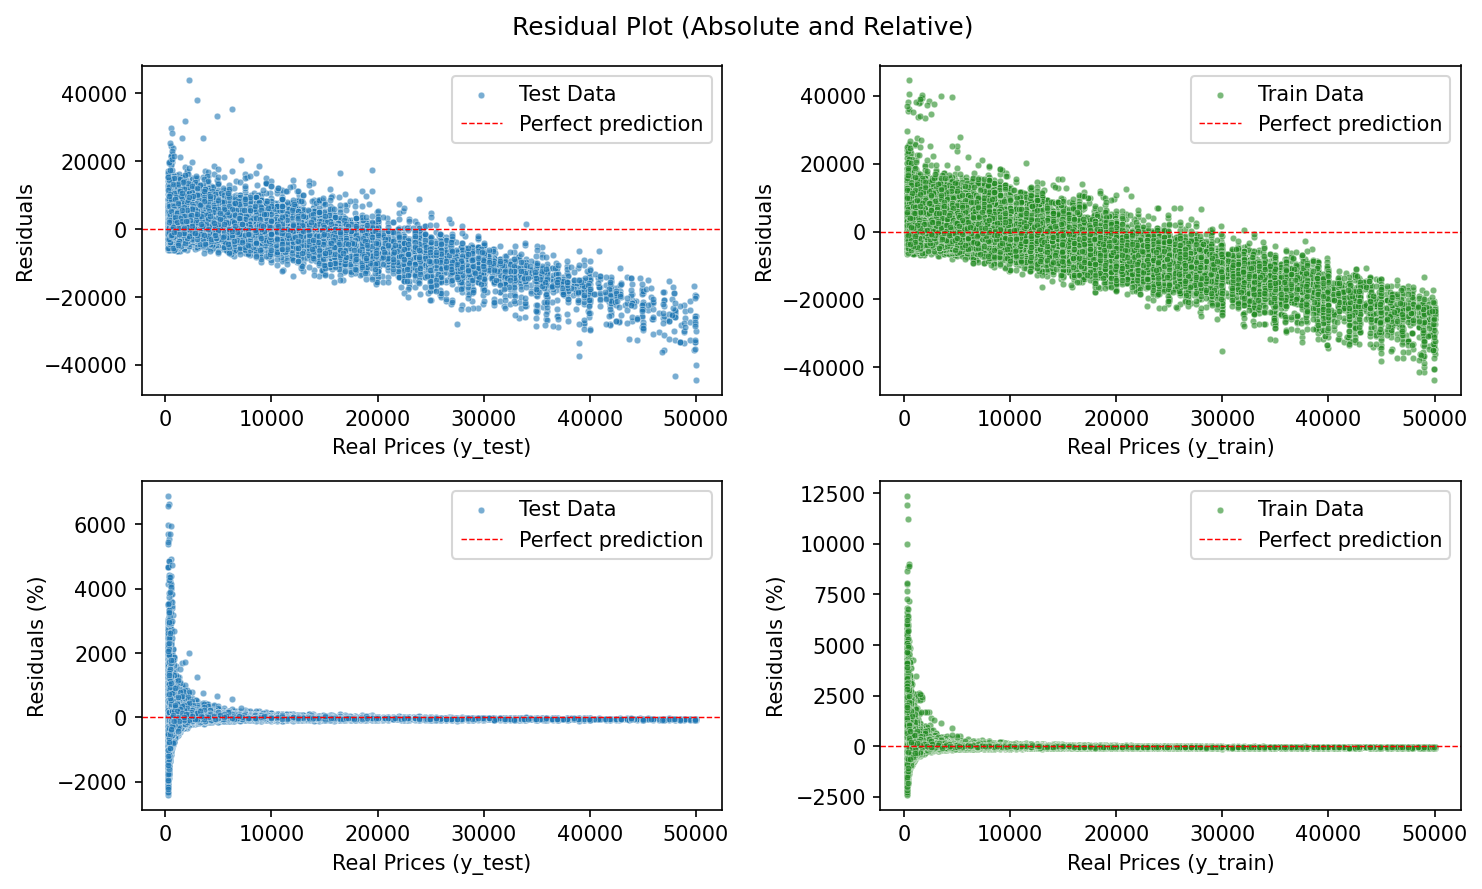

In [17]:
sp.plot_residuals(y_test, y_test_pred, y_train, y_train_pred)

#### Se observa que los errores son mayores para precios altos (en términos absolutos) y para precios bajos (en términos relativos), indicando posibles problemas de heterocedasticidad. Además, los patrones son similares entre entrenamiento y prueba, lo que sugiere que el modelo generaliza bien pero puede tener dificultades con valores extremos.

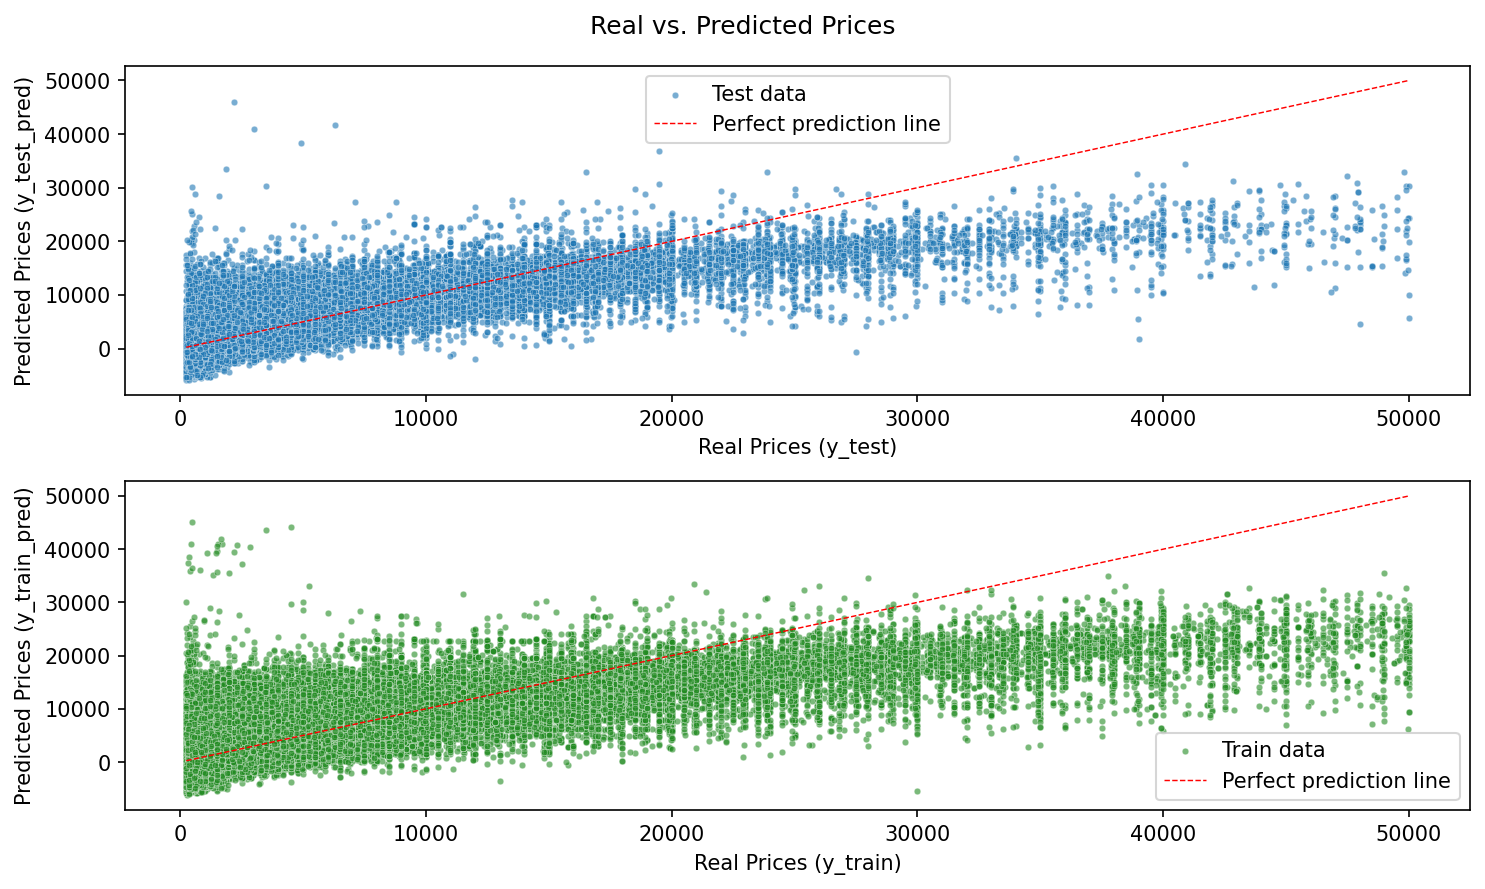

In [18]:
sp.plot_real_vs_predicted(y_test, y_test_pred, y_train, y_train_pred)

#### La gráfica muestra que el modelo sigue la tendencia general, pero presenta errores sistemáticos, subestimando o sobreestimando en diferentes rangos, especialmente para valores altos. Los patrones son similares entre entrenamiento y prueba, indicando buena generalización pero con margen de mejora en la precisión.